In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model  import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
dta = sm.datasets.fair.load_pandas().data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
import numpy as np

In [3]:
dta['Affairs'] = np.where(dta['affairs']>0,1,0)

In [17]:
dta.shape

(6366, 10)

In [6]:
dta.Affairs.value_counts()

0    4313
1    2053
Name: Affairs, dtype: int64

In [27]:
df = dta.drop('affairs',axis = 1)

In [5]:
import seaborn as sns

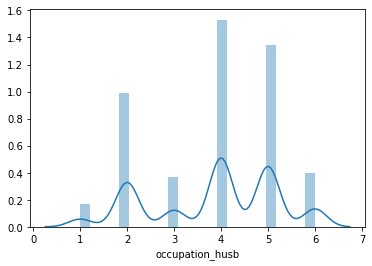

In [19]:
sns.distplot(df['occupation_husb'])

In [20]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,Affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [27]:
for columns in df:
    print(df[columns].value_counts())
    

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64
27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64
2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64
0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64
3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64
14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64
3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64
4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64
0    4313
1    2053
Name: Affairs, dtype: int64


In [28]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,Affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [24]:
df.occupation_husb.value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

In [37]:
a = { 1: 'student', 2 : 'farming/semi-skilled/unskilled', 3:"white collar", 4 : 'teacher/nurse/writer/technician/skilled', 5:'managerial/business', 
       6 : 'professional with advanced degree' 
    }

In [38]:
df['occupation'] = df['occupation'].map(a)

In [39]:
df['occupation_husb'] = df['occupation_husb'].map(a)

In [40]:
df = pd.get_dummies(df,drop_first=True)

In [41]:
df.shape

(6366, 17)

In [42]:
X = df.drop('Affairs',axis=1)
y = df['Affairs']

In [43]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_managerial/business,occupation_professional with advanced degree,occupation_student,occupation_teacher/nurse/writer/technician/skilled,occupation_white collar,occupation_husb_managerial/business,occupation_husb_professional with advanced degree,occupation_husb_student,occupation_husb_teacher/nurse/writer/technician/skilled,occupation_husb_white collar
0,3.0,32.0,9.0,3.0,3.0,17.0,0,0,0,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,0,0,1,0,0,0,1,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,0,0,1,1,0,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,0,1,0,0,0,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,0,0,1,0,0,0,1,0


In [47]:
#perform scaling 
from sklearn.preprocessing import StandardScaler
Scl = StandardScaler()
X = Scl.fit_transform(X)

In [48]:
#Splitting in Training and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [49]:
logit = LogisticRegression()
model = logit.fit(X_train,y_train)

In [50]:
predict = model.predict(X_test)

In [51]:
print(metrics.confusion_matrix(y_test,predict))

[[1137  126]
 [ 423  224]]


In [52]:
print(metrics.accuracy_score(y_test,predict))

0.712565445026178


In [43]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1263
           1       0.65      0.35      0.45       647

    accuracy                           0.72      1910
   macro avg       0.69      0.63      0.63      1910
weighted avg       0.70      0.72      0.69      1910



###plotting ROC AND GET AUC AREA

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Logistic: ROC AUC=0.732


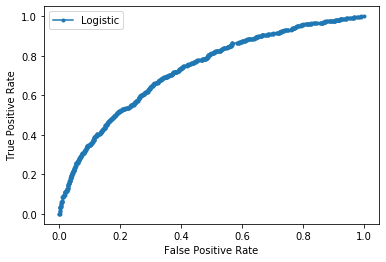

In [54]:

lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()